
# Logistic Regression (aka logit, MaxEnt) classifier.

+ basic sklearn calls
+ Poor classification performance compared to random forests


In [32]:
import numpy as np
import pylab as plt
from sklearn import svm
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from tqdm import tqdm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [33]:
# getdata
import pandas as pd
df=pd.read_csv('../datasets/CAD-PTSDData.csv',index_col=0)
y=df.iloc[:,0]
X=df.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
y_train.shape



(212,)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
clf = RandomForestClassifier(max_depth=10, class_weight='balanced',n_estimators=1000)


clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"% (y_test.shape[0],(y_test != y_pred).sum()))

acc=clf.score(X_test,y_test)
y_pred=clf.predict_proba(X_test)
y_pred_insample=clf.predict_proba(X_train)
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred[:,1], pos_label=1)
fpr_insample, tpr_insample, thresholds_insample = metrics.roc_curve(y_train,y_pred_insample[:,1], pos_label=1)
auc=metrics.auc(fpr, tpr)
auc_insample=metrics.auc(fpr_insample, tpr_insample)

print('Accuracy: ',acc,'AUC oos: ',auc,'AUC in sample: ',auc_insample)

Number of mislabeled points out of a total 122 points : 25
Accuracy:  0.7950819672131147 AUC oos:  0.8628048780487805 AUC in sample:  1.0


In [35]:
clfl = LogisticRegression()
clfl.fit(X_train, y_train)

y_pred = clfl.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"% (y_test.shape[0],(y_test != y_pred).sum()))

acc=clfl.score(X_test,y_test)
y_pred=clfl.predict_proba(X_test)
y_pred_insample=clfl.predict_proba(X_train)
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred[:,1], pos_label=1)
fpr_insample, tpr_insample, thresholds_insample = metrics.roc_curve(y_train,y_pred_insample[:,1], pos_label=1)
auc=metrics.auc(fpr, tpr)
auc_insample=metrics.auc(fpr_insample, tpr_insample)

print('Accuracy: ',acc,'AUC oos: ',auc,'AUC in sample: ',auc_insample)


Number of mislabeled points out of a total 122 points : 28
Accuracy:  0.7704918032786885 AUC oos:  0.8234756097560976 AUC in sample:  1.0


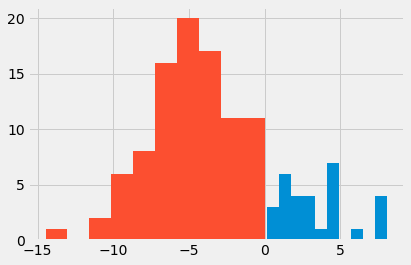

In [36]:
# histogram of distance to seprating hyperplane
d=clfl.decision_function(X_test)
plt.hist(d[d>0])
plt.hist(d[d<0])
sample_sort=np.argsort(np.fabs(d))

# Feature importance of Logistic Regression

<BarContainer object of 211 artists>

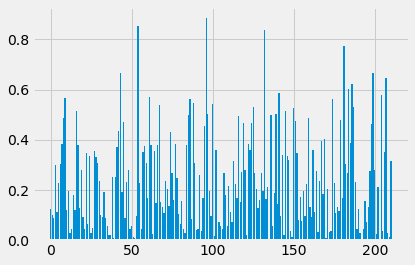

In [37]:
# Those values, however, will show that the second parameter
# is more influential
plt.bar(np.arange(X.shape[1]),np.fabs(X_test.std().values*clfl.coef_[0]))